<a href="https://colab.research.google.com/github/Mercymerine/ML2_notes/blob/main/PCA_NON_LINEAR_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MANIFOLD LEARNING
While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data; we will see some examples of these below.

To address this deficiency, we can turn to a class of methods known as manifold learning—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces.

## Analogy

**What’s a Manifold?**

Imagine a flat sheet of paper. It’s a simple, two-dimensional object.

Even if you place it in our three-dimensional world, the paper itself is still two-dimensional because you can describe every point on it with just two numbers (e.g., x and y coordinates).

**Simple Transformations**
If you rotate, stretch, or re-orient the paper (like turning it sideways or stretching it out), it’s still flat and two-dimensional. These are straightforward changes that don’t mess with the essence of the paper's flatness.

These changes are called linear embeddings because they preserve the “flat” structure of the paper.

**Complex Transformations**

Now, imagine bending, curling, or crumpling the paper. It still exists in a three-dimensional space, but the flat nature of the paper becomes harder to recognize.

However, deep down, the paper is still two-dimensional—it just looks complicated because of how it’s twisted in the three-dimensional world.

**What Manifold Learning Does:**

Manifold learning algorithms try to uncover the true, simple nature of the paper (its flat, two-dimensional form), no matter how it’s twisted or stretched in higher dimensions.



# Non-Linear Dimensioanlity Reduction

Non-linear methods are employed when data exhibits complex, non-linear relationships that linear methods like PCA cannot capture.

1. t-Distributed Stochastic Neighbor Embedding (t-SNE)
2. Isometric Mapping (Isomap)
3. Multidimensional scaling
4. Local Linear Embedding(LLE)



### Choosing Between Linear and Non-Linear Methods

**When to Use Linear Methods:**
Data relationships are predominantly linear.

Interpretability and computational efficiency are priorities.

**When to Use Non-Linear Methods:**
Data exhibits complex, non-linear relationships.

The goal is to capture intrinsic manifold structures.







## Importing Packages

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets


## Getting and creating  a visual representation of the data

In [ ]:
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)


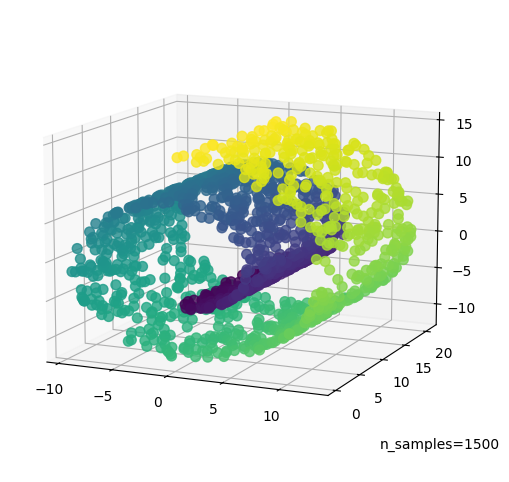

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
  )
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

## Using PCA
Uses eulidean distance hence ignores topography of the image.

It does not workf for things like facial recognition because for facial recognition the part of the face the feature is found matter in addition to the distance between one feature and another.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(sr_points)
np.sum(pca.explained_variance_ratio_)


0.7145026866231375

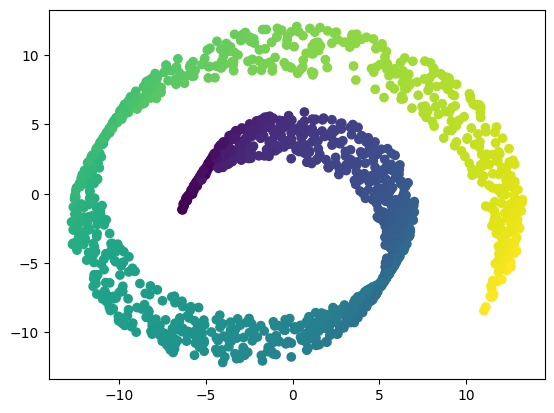

In [ ]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=sr_color)
plt.show()

## Isomap

Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points.

Looks for shortest distance between  two points but is not bound by straigh lines(it can have a polynomial shape)
Geodesic distance

**Purpose:** Emphasizes how Isomap preserves global structures by accounting for the shortest paths on the manifold.

N/B: Geodesic distance is the shortest path between two points on a curved surface or manifold, similar to how a person might walk "as the crow flies" on a hill rather than tunneling straight through it.

Euclidean Distance: Measures a straight line through the roll.

Geodesic Distance: Follows the curved path along the roll’s surface

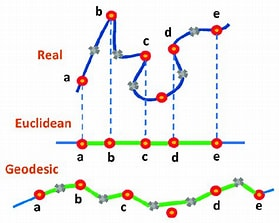


In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components=2)
x_iso = iso.fit_transform(sr_points)

In [ ]:
iso.reconstruction_error()


20.406922535858968

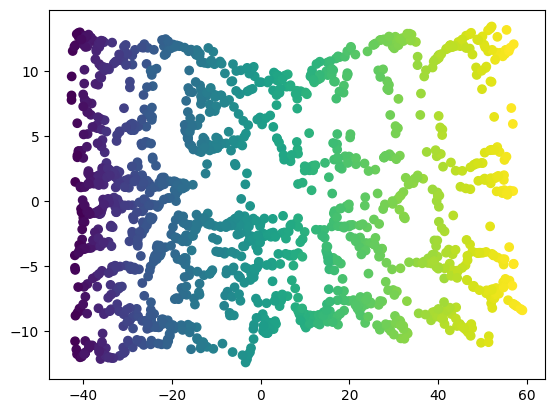

In [ ]:
plt.scatter(x_iso[:, 0], x_iso[:, 1], c=sr_color)
plt.show()

## Locally Linear Embedding (LLE)

Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods.

Takes into consideration the topography and stays within the boundaries of the image.
Not restricted to curves
Uses neares neighbors to move in small lines.


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
lle = LocallyLinearEmbedding(n_components=2)
x_lle = lle.fit_transform(sr_points)


In [ ]:
# Reconstruction error: how much information is lost

lle.reconstruction_error_

2.8798869867473057e-12

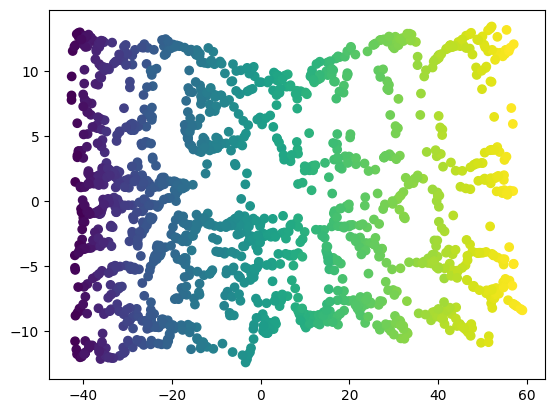

In [ ]:
plt.scatter(x_iso[:, 0], x_iso[:, 1], c=sr_color)
plt.show()

## T-distributed Stochastic Neighbor Embedding(t-SNE)

Able to visualize high dimensioanlity problems

Use in genetics and cancer research where there are thousands of variables

Specify the levle of perplexity(5 to 50)
Perplexity nuber relates to how many neighbors are considered

Large datasets require high perplexity.

#### Benefits

1. Captures complex, non-linear patterns.
2. Effective for visualizing clusters in high-dimensional data.

Disadvantages
1. Primarily for visualization; not suitable for downstream machine learning tasks.
2. Computationally intensive with large datasets.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=5)
x_tsne = tsne.fit_transform(sr_points)

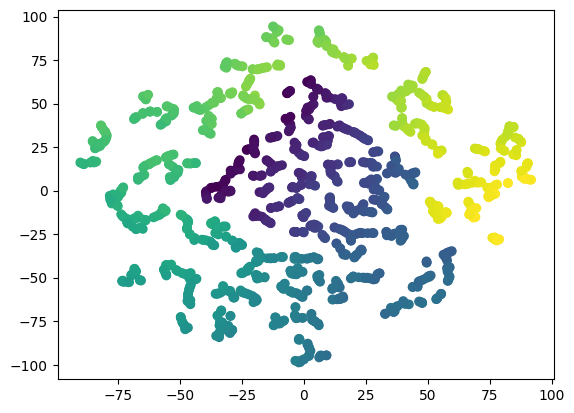

In [ ]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=sr_color)
plt.show()

In [ ]:
tsne = TSNE(n_components=2, perplexity=50)
x_tsne = tsne.fit_transform(sr_points)

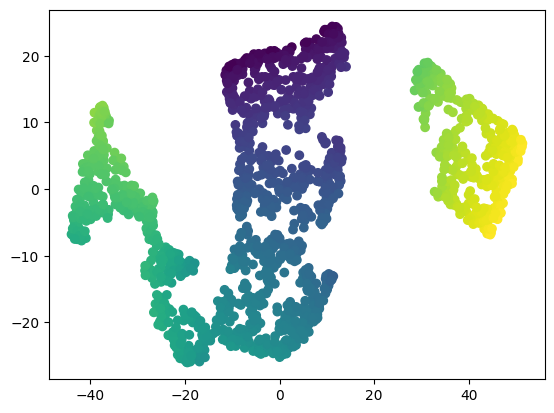

In [ ]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=sr_color)
plt.show()

**Analogy:**
Imagine you are trying to understand the layout of a city by talking to people in different neighborhoods. Each neighborhood can be thought of as a data point, and the connections between neighborhoods as the similarities between them.

**High perplexity:** This is like asking a larger group of people (from many neighborhoods) about the city layout, giving you a more global view. You have a broader perspective, so you focus on the larger areas and ignore the finer details. The algorithm assumes that each point (neighborhood) has many neighbors, so it looks for more general patterns, resulting in broader groupings.

**Low perplexity:** This is like asking a smaller group of people from each neighborhood, giving you a more local view. You're zooming in on the immediate area around each point, paying more attention to the immediate neighbors. The algorithm assumes each point has fewer neighbors, so it focuses on fine-grained details and small-scale structures.

**In t-SNE terms:**
**High perplexity (e.g., 50 or 100):** Means t-SNE will consider a larger number of neighbors for each point. The result is that the algorithm tries to preserve more global structure, grouping similar points together over a larger distance.

**Low perplexity (e.g., 5 or 10):** Means t-SNE will focus on fewer neighbors for each point. The result is that the algorithm preserves more local structure, emphasizing fine differences between points that are close together.

**Summary:**
High perplexity = focuses on global structure and larger neighborhoods.

Low perplexity = focuses on local structure and smaller neighborhoods.

## Multidimensional Scaling (MDS) - Assignment


## Limitations of these techniques:

1. Computational Complexity: They are often slow and resource-intensive, especially for large datasets.

2. Interpretability: They capture non-linear relationships but are harder to interpret compared to simpler, linear methods like PCA.

3. Hyperparameter Sensitivity: Choosing the right parameters can be tricky and affect performance.

4. Better Alternatives: Techniques like autoencoders or PCA are often faster, easier, and more scalable.

5. Mainly for Visualization: They are most useful for visualizing high-dimensional data, not always for other tasks like classification or regression.

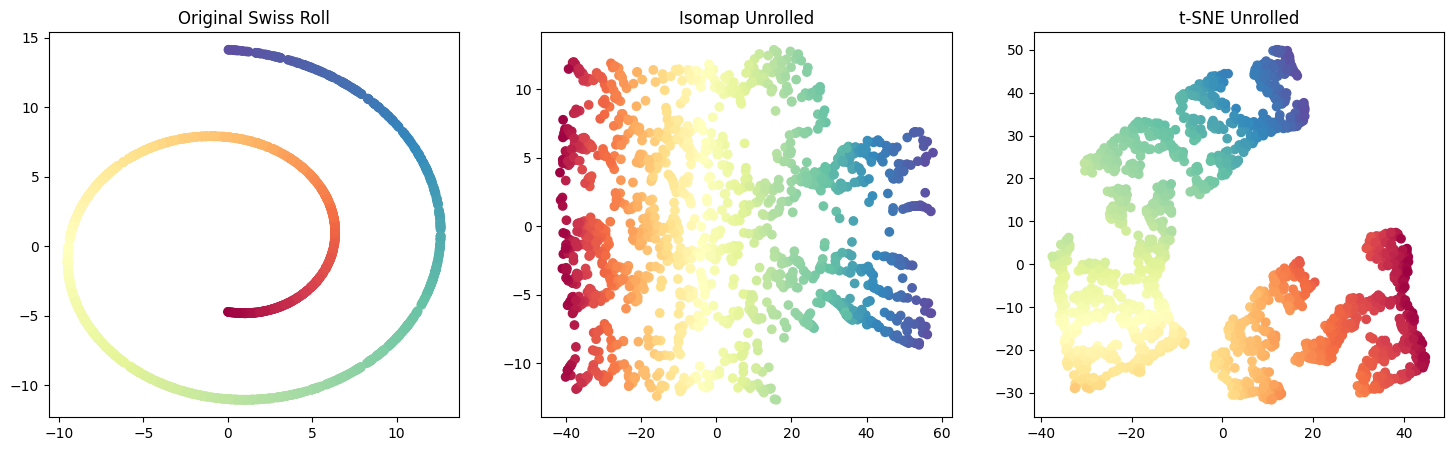

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap, TSNE

# Generate Swiss Roll dataset
n_samples = 1500
X, color = make_swiss_roll(n_samples)

# Apply Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Original Swiss Roll
ax[0].scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax[0].set_title("Original Swiss Roll")

# Isomap result
ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
ax[1].set_title("Isomap Unrolled")

# t-SNE result
ax[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
ax[2].set_title("t-SNE Unrolled")

plt.show()
